# Third Notebook

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Perceptron

# DATA EXPLORATION

In [42]:
data_train = pd.read_csv("../Data/train.csv")
data_test = pd.read_csv("../Data/test.csv")
m_train, n_train = data_train.shape
m_test, n_test = data_test.shape
print(f"Shape train data: {m_train, n_train}")
print(f"Shape test data: {m_test, n_test}")

Shape train data: (1460, 81)
Shape test data: (1459, 80)


In [43]:
data_train.describe() # Same for test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [44]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [45]:
num_features = data_train.select_dtypes(exclude='object')
cat_features = data_train.select_dtypes(include='object') 

<AxesSubplot:>

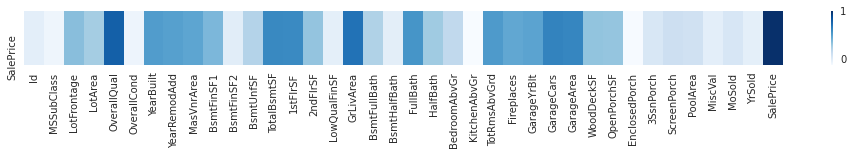

In [46]:
num_corr = num_features.corr()

plt.subplots(figsize=(17,1))
sns.heatmap(num_corr.sort_values(by="SalePrice", ascending=False).head(1), cmap='Blues')

In [47]:
data_train.isna().sum().sort_values(ascending=False).head(20) / m_train # Pourcentage de value NaN par Col

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
dtype: float64

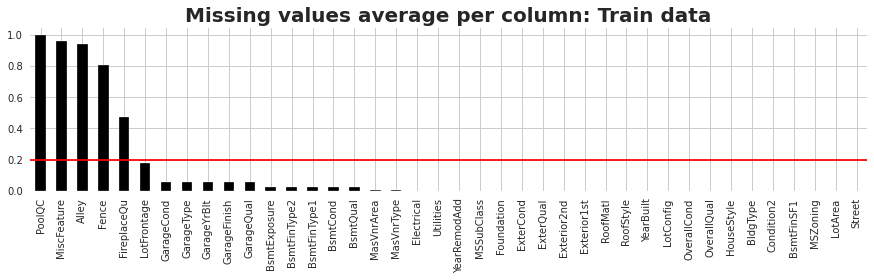

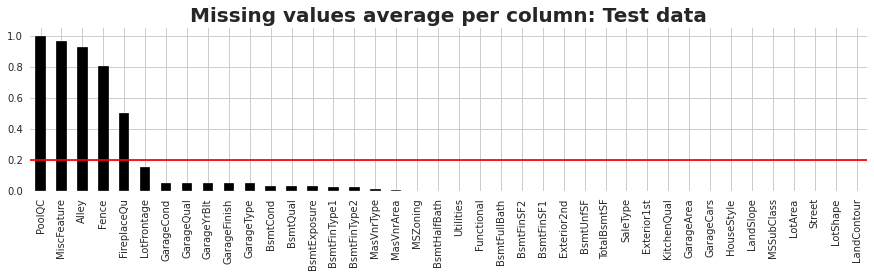

In [48]:
def plotbar_missing_values_average(dataset, dataset_name):
    plt.style.use('seaborn')
    sns.set_style('whitegrid')

    plt.subplots(figsize=(15,3))
    dataset.isnull().mean().sort_values(ascending=False).head(40).plot.bar(color='black')
    plt.axhline(y=0.2, color='r', linestyle='-')
    plt.title(f'Missing values average per column: {dataset_name}', fontsize=20, weight='bold' )
    plt.show()
    
plotbar_missing_values_average(data_train, 'Train data')
plotbar_missing_values_average(data_test, 'Test data')

# DATA PREPROCING

In [49]:
X, y = data_train.drop(columns="SalePrice"), data_train["SalePrice"].copy()
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)
X_test = data_test.copy()

In [50]:
numerical_cols = X_train.select_dtypes(exclude='object').columns
categorical_cols = X_train.select_dtypes(include='object').columns

## Pipeline

In [51]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

## Model Training

In [52]:
model = Perceptron()

In [53]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFl...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 

## Predict Train

In [54]:
y_pred_train = clf.predict(X_train)
print('RMSLE:', np.sqrt(mean_squared_log_error(y_train, y_pred_train)))

RMSLE: 0.09971656070119171


## Predict Valid

In [55]:
y_pred_valid = clf.predict(X_valid)
print('RMSLE:', np.sqrt(mean_squared_log_error(y_valid, y_pred_valid)))

RMSLE: 0.3147778155595754


## Cross Validation Score

In [56]:
scores = np.sqrt(-1 * cross_val_score(clf, X, y,
                             cv=5,
                             scoring='neg_mean_squared_log_error'))
print('Average RMSLE score:', scores.mean())

Average RMSLE score: 0.3270670073857548


## Submission

In [60]:
y_pred_test = clf.predict(X_test)

In [61]:
pd_csv = X_test[['Id']].copy()
pd_csv['SalePrice'] = y_pred_test

In [63]:
pd_csv.to_csv('submission_1.csv', index=False)